In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv(r"C:\Users\debgd\Documents\EjerciciosMachineLearning\EjercicioTitanic\titanic\archive\A_Z Handwritten Data.csv").astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}


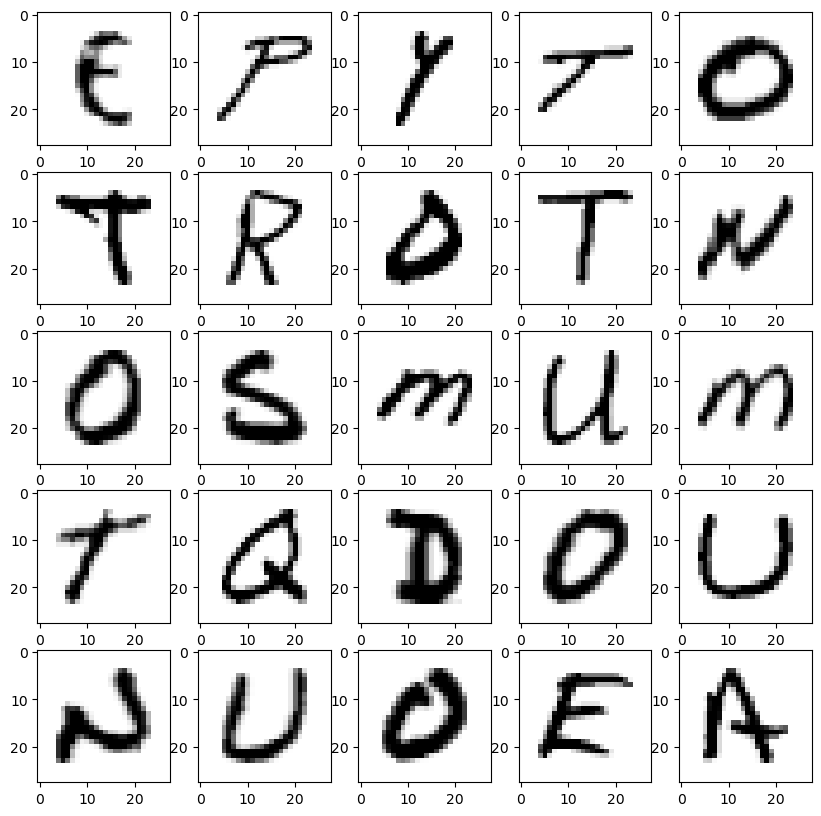

In [6]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(5,5, figsize = (10,10))
axes = ax.flatten()
for i in range(25):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [7]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [8]:
train_yOHE = to_categorical(train_y, num_classes = 26)
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26)
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

c:\Users\debgd\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=3,  validation_data = (test_X,test_yOHE))

Epoch 1/3
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9133 - loss: 0.3680 - val_accuracy: 0.9759 - val_loss: 0.0866
Epoch 2/3
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9795 - loss: 0.0749 - val_accuracy: 0.9851 - val_loss: 0.0552
Epoch 3/3
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9837 - loss: 0.0591 - val_accuracy: 0.9832 - val_loss: 0.0633


In [11]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9758625030517578, 0.9850852489471436, 0.9831520915031433]
The training accuracy is : [0.9575915932655334, 0.9803832769393921, 0.9837159514427185]
The validation loss is : [0.08657609671354294, 0.055201150476932526, 0.06326184421777725]
The training loss is : [0.1565180867910385, 0.072203628718853, 0.06017659604549408]


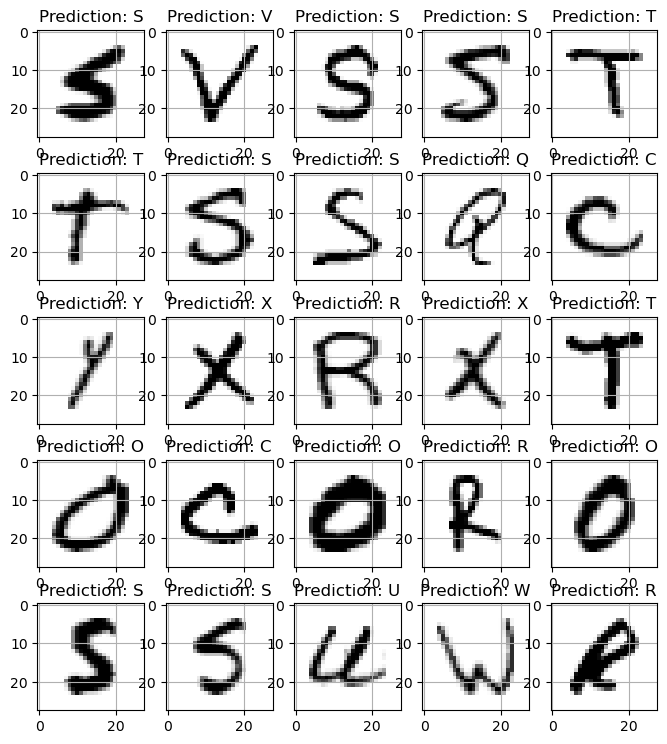

In [12]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [13]:
img = cv2.imread(r"C:\Users\debgd\Documents\EjerciciosMachineLearning\EjercicioTitanic\titanic\Lab5.jpg")

In [14]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [15]:

img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400, 440))


img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)


_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)


contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

letters = []
lettersE = []
lettersX = []
lettersA = []

CoordX= []
CoordE= []
CoordA= []


for cnt in contours:
    
    x, y, w, h = cv2.boundingRect(cnt)
    img_crop = img_thresh[y:y+h, x:x+w]
    img_crop = cv2.resize(img_crop, (28, 28))
    img_crop = np.reshape(img_crop, (1, 28, 28, 1))
    img_pred = word_dict[np.argmax(model.predict(img_crop))]
    letters.append((img_pred,(x,y)))
    if img_pred == 'X':
        lettersX.append((img_pred,(x,y)))
        CoordX.append((x,y))
    if img_pred == 'E':
        lettersE.append((img_pred,(x,y)))
        CoordE.append((x,y))
    if img_pred == 'A':
        lettersA.append((img_pred,(x,y)))
        CoordA.append((x,y))
        
cv2.putText(img, "Lab4", (20, 25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color=(30, 30, 30))
cv2.imshow('Imagen ', img)

print("Las letras reconocidas y sus posiciones son:")
for letter in letters:
    print(letter)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Las letras reconocidas y sus posiciones son:
('X', (73, 588))
('X', (486, 538))
('X', (72, 186))


In [16]:
def sort_box_points(box):
    # Ordenar los puntos extremos de la envolvente convexa en el orden deseado
    rect = np.zeros((4, 2), dtype=np.float32)

    # Obtener los puntos extremos en coordenadas (x, y)
    s = box.sum(axis=1)
    rect[0] = box[np.argmin(s)]
    rect[2] = box[np.argmax(s)]

    diff = np.diff(box, axis=1)
    rect[1] = box[np.argmin(diff)]
    rect[3] = box[np.argmax(diff)]

    #print("Puntos extremos ordenados:", rect)  # Agregar esta línea para imprimir los puntos ordenados

    return rect

In [17]:
img = cv2.imread(r"C:\Users\debgd\Documents\EjerciciosMachineLearning\EjercicioTitanic\titanic\Lab5.jpg")
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
_, img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img_thresh = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)
contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
letters = []
lettersE = []
lettersX = []
lettersB = []
lettersY = []
lettersZ = []
CoordX= []
CoordE= []
CoordB= []
CoordY= []
CoordZ= []
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    area = rect[1][0] * rect[1][1]
    if(area >200)&(area<25000):
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(img,[box],0,(0,255,0),3)
        x, y, w, h = cv2.boundingRect(cnt)
        ancho = y
        alto = h
        # Ordenar los puntos extremos de la envolvente convexa
        box = sort_box_points(box)

        # Definir los puntos extremos ordenados en un orden estándar
        standard_points = np.array([[0, 0], [ancho - 1, 0], [ancho - 1, alto - 1], [0, alto - 1]], dtype=np.float32)

        # Calcular la matriz de transformación de perspectiva
        transform_matrix = cv2.getPerspectiveTransform(box, standard_points)

        # Aplicar la transformación de perspectiva a la región de interés
        img_crop = cv2.warpPerspective(img_thresh, transform_matrix, (ancho, alto))

        # Redimensionar la región de interés transformada
        img_crop = cv2.resize(img_crop, (28, 28))

        # Realizar la clasificación utilizando el modelo
        img_crop = np.reshape(img_crop, (1, 28, 28, 1))
        img_pred = labels[np.argmax(model.predict(img_crop))]
        if img_pred == 'F':
            lettersX.append((img_pred,(x,y)))
            CoordX.append((x,y))
        if img_pred == 'K':
            lettersE.append((img_pred,(x,y)))
            CoordE.append((x,y))
        if img_pred == 'C':
            lettersB.append((img_pred,(x,y)))
            CoordB.append((x,y))
        if img_pred == 'N':
            lettersY.append((img_pred,(x,y)))
            CoordY.append((x,y))
        if img_pred == 'X':
            lettersZ.append((img_pred,(x,y)))
            CoordZ.append((x,y))
        print("Paso 1", img_pred, x, y)

        # Si no detecta alguna letra dentro de las que quiero identificar
        if (img_pred != 'F') and (img_pred != 'C') and (img_pred != 'K') and (img_pred != 'N')and (img_pred != 'X'):
            # Definir los puntos extremos ordenados en un orden estándar
            standard_points = np.array([[0, alto - 1], [ancho - 1, alto - 1], [ancho - 1, 0], [0, 0]], dtype=np.float32)

            # Calcular la matriz de transformación de perspectiva
            transform_matrix = cv2.getPerspectiveTransform(box, standard_points)
            img_crop = img_thresh[y:y+h, x:x+w]
            # Aplicar la transformación de perspectiva a la región de interés
            img_crop = cv2.warpPerspective(img_thresh, transform_matrix, (ancho, alto))

            # Redimensionar la región de interés transformada
            img_crop = cv2.resize(img_crop, (28, 28))

            # Realizar la clasificación utilizando el modelo
            img_crop = np.reshape(img_crop, (1, 28, 28, 1))
            img_pred = labels[np.argmax(model.predict(img_crop))]
            if img_pred == 'F':
                lettersX.append((img_pred,(x,y)))
                CoordX.append((x,y))
            if img_pred == 'K':
                lettersE.append((img_pred,(x,y)))
                CoordE.append((x,y))
            if img_pred == 'C':
                lettersB.append((img_pred,(x,y)))
                CoordB.append((x,y))
            if img_pred == 'N':
                lettersY.append((img_pred,(x,y)))
                CoordY.append((x,y))
            if img_pred == 'X':
                lettersZ.append((img_pred,(x,y)))
                CoordZ.append((x,y))
            print("Paso 2", img_pred, x, y)

            # Si no detecta alguna letra dentro de las que quiero identificar
            if (img_pred != 'F') and (img_pred != 'C') and (img_pred != 'K') and (img_pred != 'N')and (img_pred != 'X'):
                # Definir los puntos extremos ordenados en un orden estándar
                standard_points = np.array([[ancho - 1, alto - 1], [ancho - 1, 0], [0, 0], [0, alto - 1]],dtype=np.float32)

                # Calcular la matriz de transformación de perspectiva
                transform_matrix = cv2.getPerspectiveTransform(box, standard_points)

                # Aplicar la transformación de perspectiva a la región de interés
                img_crop = cv2.warpPerspective(img_thresh, transform_matrix, (ancho, alto))

                # Redimensionar la región de interés transformada
                img_crop = cv2.resize(img_crop, (28, 28))

                # Realizar la clasificación utilizando el modelo
                img_crop = np.reshape(img_crop, (1, 28, 28, 1))
                img_pred = labels[np.argmax(model.predict(img_crop))]
                if img_pred == 'F':
                    lettersX.append((img_pred,(x,y)))
                    CoordX.append((x,y))
                if img_pred == 'K':
                    lettersE.append((img_pred,(x,y)))
                    CoordE.append((x,y))
                if img_pred == 'C':
                    lettersB.append((img_pred,(x,y)))
                    CoordB.append((x,y))
                if img_pred == 'N':
                    lettersY.append((img_pred,(x,y)))
                    CoordY.append((x,y))
                if img_pred == 'X':
                    lettersZ.append((img_pred,(x,y)))
                    CoordZ.append((x,y))
                print("Paso 3", img_pred, x, y)

                # Si no detecta alguna letra dentro de las que quiero identificar
                if (img_pred != 'F') and (img_pred != 'C') and (img_pred != 'K') and (img_pred != 'N')and (img_pred != 'X'):
                    # Definir los puntos extremos ordenados en un orden estándar
                    standard_points = np.array([[ancho - 1, alto - 1], [0, alto - 1], [0, 0], [ancho - 1, 0]],dtype=np.float32)

                    # Calcular la matriz de transformación de perspectiva
                    transform_matrix = cv2.getPerspectiveTransform(box, standard_points)

                    # Aplicar la transformación de perspectiva a la región de interés
                    img_crop = cv2.warpPerspective(img_thresh, transform_matrix, (ancho, alto))

                    # Redimensionar la región de interés transformada
                    img_crop = cv2.resize(img_crop, (28, 28))

                    # Realizar la clasificación utilizando el modelo
                    img_crop = np.reshape(img_crop, (1, 28, 28, 1))
                    img_pred = labels[np.argmax(model.predict(img_crop))]
                    if img_pred == 'F':
                        lettersX.append((img_pred,(x,y)))
                        CoordX.append((x,y))
                    if img_pred == 'K':
                        lettersE.append((img_pred,(x,y)))
                        CoordE.append((x,y))
                    if img_pred == 'C':
                        lettersB.append((img_pred,(x,y)))
                        CoordB.append((x,y))
                    if img_pred == 'N':
                        lettersY.append((img_pred,(x,y)))
                        CoordY.append((x,y))
                    if img_pred == 'X':
                        lettersZ.append((img_pred,(x,y)))
                        CoordZ.append((x,y))
                    print("Paso 4", img_pred, x, y)

                    # Si no detecta alguna letra dentro de las que quiero identificar
                    if (img_pred != 'F') and (img_pred != 'C') and (img_pred != 'K') and (img_pred != 'N')and (img_pred != 'X'):
                        # Definir los puntos extremos ordenados en un orden estándar
                        standard_points = np.array([[0, alto - 1], [0, 0], [ancho - 1, 0], [ancho - 1, alto - 1]],dtype=np.float32)

                        # Calcular la matriz de transformación de perspectiva
                        transform_matrix = cv2.getPerspectiveTransform(box, standard_points)

                        # Aplicar la transformación de perspectiva a la región de interés
                        img_crop = cv2.warpPerspective(img_thresh, transform_matrix, (ancho, alto))

                        # Redimensionar la región de interés transformada
                        img_crop = cv2.resize(img_crop, (28, 28))

                        # Realizar la clasificación utilizando el modelo
                        img_crop = np.reshape(img_crop, (1, 28, 28, 1))
                        img_pred = labels[np.argmax(model.predict(img_crop))]
                        if img_pred == 'F':
                            lettersX.append((img_pred,(x,y)))
                            CoordX.append((x,y))
                        if img_pred == 'K':
                            lettersE.append((img_pred,(x,y)))
                            CoordE.append((x,y))
                        if img_pred == 'C':
                            lettersB.append((img_pred,(x,y)))
                            CoordB.append((x,y))
                        if img_pred == 'N':
                            lettersY.append((img_pred,(x,y)))
                            CoordY.append((x,y))
                        if img_pred == 'X':
                            lettersZ.append((img_pred,(x,y)))
                            CoordZ.append((x,y))
                        print("Paso 5", img_pred, x, y)

                        # Si no detecta alguna letra dentro de las que quiero identificar
                        if (img_pred != 'F') and (img_pred != 'C') and (img_pred != 'K') and (img_pred != 'N')and (img_pred != 'X'):
                            # Definir los puntos extremos ordenados en un orden estándar
                            standard_points = np.array([[ancho - 1, 0], [ancho - 1, alto - 1], [0, alto - 1], [0, 0]],dtype=np.float32)

                            # Calcular la matriz de transformación de perspectiva
                            transform_matrix = cv2.getPerspectiveTransform(box, standard_points)

                            # Aplicar la transformación de perspectiva a la región de interés
                            img_crop = cv2.warpPerspective(img_thresh, transform_matrix, (ancho, alto))

                            # Redimensionar la región de interés transformada
                            img_crop = cv2.resize(img_crop, (28, 28))

                            # Realizar la clasificación utilizando el modelo
                            img_crop = np.reshape(img_crop, (1, 28, 28, 1))
                            img_pred = labels[np.argmax(model.predict(img_crop))]
                            if img_pred == 'F':
                                lettersX.append((img_pred,(x,y)))
                                CoordX.append((x,y))
                            if img_pred == 'K':
                                lettersE.append((img_pred,(x,y)))
                                CoordE.append((x,y))
                            if img_pred == 'C':
                                lettersB.append((img_pred,(x,y)))
                                CoordB.append((x,y))
                            if img_pred == 'N':
                                lettersY.append((img_pred,(x,y)))
                                CoordY.append((x,y))
                            if img_pred == 'X':
                                lettersZ.append((img_pred,(x,y)))
                                CoordZ.append((x,y))
                            print("Paso 6", img_pred, x, y)
           
        
cv2.putText(img, "Lab4", (20, 25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color=(30, 30, 30))
cv2.imshow('Imagen ', img)
print("Las letras reconocidas y sus posiciones son:")
for letter in letters:
    print(letter)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Paso 1 X 73 588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Paso 1 X 485 538
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


C:\Users\debgd\AppData\Local\Temp\ipykernel_30432\430786126.py:28: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


Paso 1 X 72 185
Las letras reconocidas y sus posiciones son:


In [18]:
lettersZ

[('X', (73, 588)), ('X', (485, 538)), ('X', (72, 185))]

In [69]:
dict_city = {     '1':[73, 588], '2': [485, 538], '3':[72, 185], '4':[212, 565], '5':[565, 477], 
                  '6':[849, 424],'7':[356, 357],'8':[897, 177],'9':[212, 109],'10':[564, 52]}

In [70]:
coord_dict = dict_city
for i, c in enumerate(CoordZ):
    coord_dict[str(i+1)] = [c[0],c[1]]

print(coord_dict)

{'1': [73, 588], '2': [485, 538], '3': [72, 185], '4': [212, 565], '5': [565, 477], '6': [849, 424], '7': [356, 357], '8': [897, 177], '9': [212, 109], '10': [564, 52]}


In [71]:
coord_dict = dict_city
coord_dict

{'1': [73, 588],
 '2': [485, 538],
 '3': [72, 185],
 '4': [212, 565],
 '5': [565, 477],
 '6': [849, 424],
 '7': [356, 357],
 '8': [897, 177],
 '9': [212, 109],
 '10': [564, 52]}

In [72]:
def distances(element1, element2):
    element1 = str(int(element1))
    element2 = str(int(element2))
    return np.linalg.norm( np.array(dict_city[element1]) - np.array(dict_city[element2]))

In [73]:
matrix = np.empty((100, 10), dtype=int) # Matriz de 
for i in range(100):
    matrix[i] = np.random.choice(range(1, 11), size=10, replace=False)

matrix_children = np.zeros((100, 10)) # Matriz de 
matrix_gen = np.zeros((100, 10)) # Matriz de 


print(matrix.shape)

(100, 10)


In [74]:
test_list = matrix[0, :].copy()
print(test_list)

[10  1  7  8  6  5  2  3  9  4]


In [75]:
def Mode_0(test_list):
    inicio_a = np.random.randint(0, 2)
    longitud_b = np.random.randint(0, 2)
    longitud = np.random.randint(0, 2) 
    
    # print(np.arange(0, 20))
    # print(longitud, inicio_a, longitud_b)
    
    
    inicio_aa = inicio_a - longitud
    fin_aa =  inicio_a
    if inicio_aa < 0:
        inicio_aa = 0
        fin_aa = longitud 
    inicio_bb =  fin_aa + longitud_b 
    fin_bb = inicio_bb + longitud
    if fin_bb > matrix.shape[1]:   
        inicio_bb =  matrix.shape[1] - longitud
        fin_bb = matrix.shape[1]
    
    # print('Vector_A', inicio_aa, fin_aa - 1)
    # print('Vector_B', inicio_bb , fin_bb - 1)

    # print('a', test_list[inicio_aa: fin_aa])
    # print('b', test_list[inicio_bb: fin_bb])
    
    aux = test_list[inicio_aa: fin_aa].copy()
    
    test_list[inicio_aa: fin_aa] = test_list[inicio_bb: fin_bb]
    test_list[inicio_bb: fin_bb] = aux

   
    return test_list

# print(test_list)
# test_mylist = Mode_0(test_list)
# print(test_mylist)
# print(np.arange(0, 20))

In [76]:
def Mode_1(test_list):
    longitud_2 = np.random.randint(0, matrix.shape[1] - 1)
    diferencia = matrix.shape[1] - longitud_2 - 1 
    inicio =  np.random.randint(0, diferencia)
    fin = inicio + longitud_2

    # print(longitud_2 , inicio, fin)
    test_list[inicio: fin] = np.flip(test_list[inicio: fin])
    return test_list
    
print(test_list)
test_mylist = Mode_1(test_list)
# print(test_mylist)
# inicio = np.random.randint(0, )

[10  1  7  8  6  5  2  3  9  4]


In [77]:
def Amp_function(matrix, renglones):
    vector_distance = np.zeros((renglones, 1))
    distance_pair = 0
    for fila in range(0, matrix.shape[0]): #filas
        for columna in range(0, matrix.shape[1] - 1): #columnas   
            distance_pair += distances(matrix[fila][columna],   matrix[fila][columna + 1]) 
        
        vector_distance[fila] = distance_pair
        distance_pair = 0
    
    matrix_plus_result = np.hstack((matrix, vector_distance)) # pegar el vector y la matriz
    
    return matrix_plus_result 

In [78]:
def tournament(matrix, matrix_children, matrix_plus_result, renglones):
    list_tournament = [[], []]
    for fila in range(0, matrix.shape[0]): #filas
    # for fila in range(0, 2): #filas
        for i in range(0, 5):
            random_num = np.random.randint(0, renglones)
            list_tournament[0].append(matrix_plus_result[random_num, 10])
            list_tournament[1].append(random_num) 
        
        winner = min(list_tournament[0])
        index  = list_tournament[1][list_tournament[0].index(winner)]
    
        # print(winner)
        # print(matrix_plus_result[index, :])
        # print(matrix[index, :])
        # print(matrix[fila, :])
        # print('-'*100)
          
        dado = np.random.randint(0, 2)
        
        if dado == 0:
            matrix_children[fila] = Mode_0(matrix[index, :].copy())
        else:
            matrix_children[fila] = Mode_1(matrix[index, :].copy())                
        
        list_tournament = [[], []]

    return matrix_children

In [79]:
def graficar(dict_city, test_list, iteracion, vec_min,  x_d ,lista_de_test ,dist_min):

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    x = [dict_city[str(int(i))][0] for i in test_list]
    y = [dict_city[str(int(i))][1] for i in test_list]
    
    if iteracion == 0:
        iteracion = 1
    

    axs[0].grid( linestyle='dotted', linewidth=1)
    axs[0].scatter(x, y, color='r')
    axs[0].plot(x, y)
    
    axs[0].set_title(f'Mejor ruta: {np.array(vec_min, dtype=int)}' , fontsize=10)
    
    for i in test_list:
        axs[0].annotate(str(int(i)), (dict_city[str(int(i))][0], dict_city[str(int(i))][1]))
    
    axs[1].grid( linestyle='dotted', linewidth=1)
    axs[1].plot(np.array(x_d), np.array(lista_de_test))
    axs[1].set_title(f'Distancia actual: {dist_min}' , fontsize=10)
    
    fig.suptitle(f'Algortimo Genetico - Problema del Viajero(TSP) - Generacion:{iteracion + 1}',  fontsize=14, y=0.98)
    fig.tight_layout()
    
    display(fig)
    
    plt.pause(0.01)
    

In [80]:
def plot_bestGen(matrix_gen, best_gen):
  fig, axs = plt.subplots(1, 1, figsize=(10, 10))

  x = [dict_city[str(int(i))][0] for i in np.array(matrix_gen[best_gen - 1,0:20].copy() , dtype=int)]
  y = [dict_city[str(int(i))][1] for i in np.array(matrix_gen[best_gen - 1,0:20].copy() , dtype=int)]


  axs.grid( linestyle='dotted', linewidth=1)
  axs.scatter(x, y, color='r')
  axs.plot(x, y)


  for i in test_list:
    axs.annotate(str(int(i)), (dict_city[str(int(i))][0], dict_city[str(int(i))][1]))

  fig.suptitle(f'Rtua de la mejor Generacion:{best_gen}',  fontsize=14, y=0.98)
  fig.tight_layout()

In [81]:
def run(iteraciones, renglones, continue_plot):
  dist_min_x_gen = []
  x_d = []

  
  matrix = np.zeros((renglones, 10), dtype=int) # Matriz de 
  
  for i in range(renglones):
      matrix[i] = np.random.choice(range(1, 11), size=10, replace=False).astype('int')

  matrix_children = np.zeros((renglones, 10)) # Matriz de 
  matrix_gen = np.zeros((renglones, 10)) # Matriz de 
  # vector_winners = np.zeros((100, 2))

  for i in range(0, iteraciones):   
      matrix_labeled = Amp_function(matrix, renglones) # Saca las distancias de las generaciones y agrega un vector columna a las matrix   
      matrix_generation = tournament(matrix, matrix_children, matrix_labeled, renglones) # Realiza el toreno
      matrix = matrix_generation # Matriz de hijos sustituye a la de padres 
      
      dist_min = min(matrix_labeled[:,10])
      x_d.append(i)    
      dist_min_x_gen.append(dist_min)
      index_min = np.where(matrix_labeled[:,10] == dist_min)
      vec_min = matrix_labeled[index_min[0][0],:10 ].copy()      
      matrix_gen[i, :10] = vec_min

      
      
      #if continue_plot == True:
        #graficar(dict_city, vec_min, i, vec_min, x_d , dist_min_x_gen, dist_min) # Comentar para ver solo la mejor ruta 

  best_gen = dist_min_x_gen.index(min(dist_min_x_gen)) + 1
  print('Distancia minima registrada:', min(dist_min_x_gen))
  print('Mejor generacion:', best_gen)
  print(f'Mejor ruta (Generacion - {best_gen}):', np.array(matrix_gen[best_gen - 1,:10].copy() , dtype=int))
  print(f'Maxima distancia registrada (Generacion - {dist_min_x_gen.index(max(dist_min_x_gen)) + 1}):', max(dist_min_x_gen))
  plot_bestGen(matrix_gen, best_gen)

Distancia minima registrada: 2175.2526411858266
Mejor generacion: 7
Mejor ruta (Generacion - 7): [10  8  6  5  2  7  4  1  3  9]
Maxima distancia registrada (Generacion - 1): 2832.680658912321


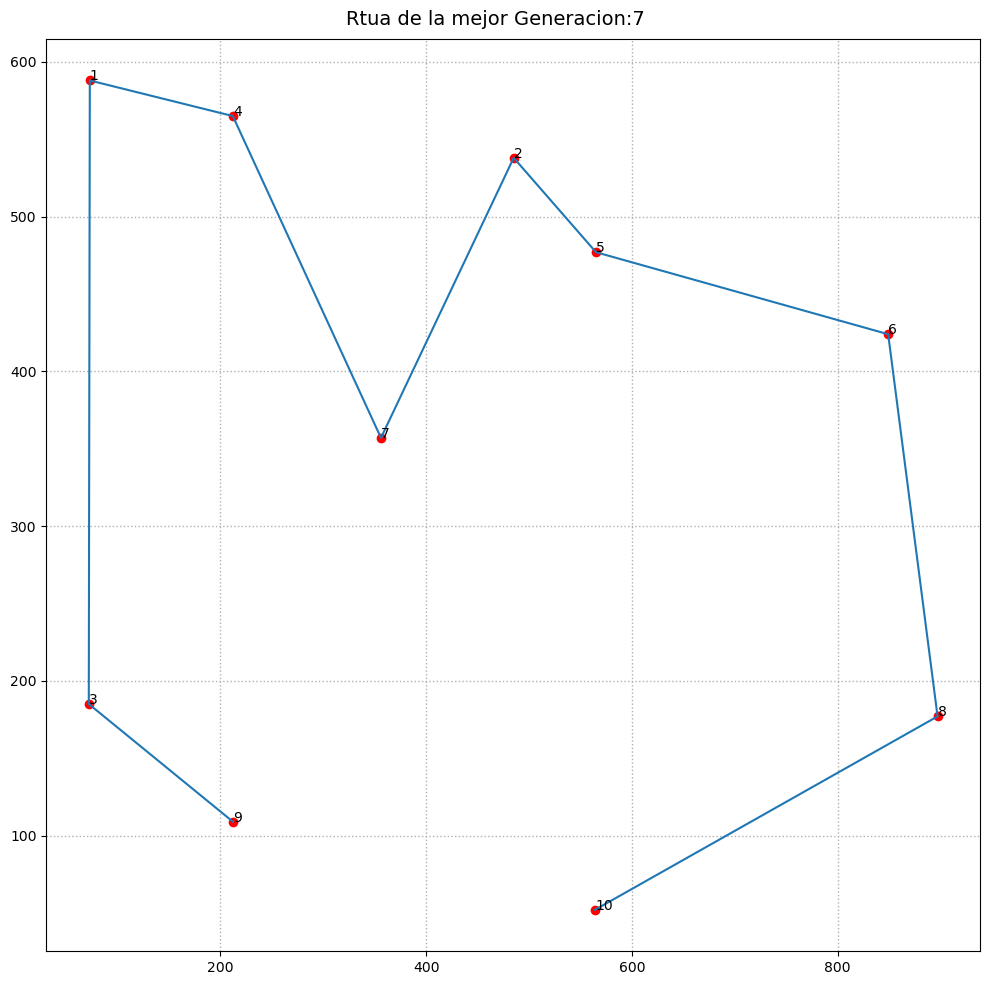

In [82]:
No_generaciones = 100 
No_Poblacion = 100
continue_plot = True

run(No_generaciones, No_Poblacion, continue_plot)

In [83]:
mejorruta = [5, 2, 4, 7, 10, 8, 9, 1, 3, 6]
new_coord_dict = {}
for i, idx in enumerate(mejorruta):
    new_coord_dict[str(i+1)] = coord_dict[str(idx)]

print(new_coord_dict)

{'1': [565, 477], '2': [485, 538], '3': [212, 565], '4': [356, 357], '5': [564, 52], '6': [897, 177], '7': [212, 109], '8': [73, 588], '9': [72, 185], '10': [849, 424]}


In [84]:
from PIL import Image

# Cargando la imagen
img = Image.open(r"C:\Users\debgd\Documents\EjerciciosMachineLearning\EjercicioTitanic\titanic\Lab5.jpg")

# Obteniendo el tamaño en píxeles de la imagen
width, height = img.size

print(f"El tamaño de la imagen es {width} x {height} píxeles.")

El tamaño de la imagen es 689 x 816 píxeles.


In [85]:
def reduce_coords_to_2x2(coords, original_width, original_height):
    # Calcular factor de escala
    scale_factor_x = original_width / 2
    scale_factor_y = original_height / 2
    
    # Escalar las coordenadas
    scaled_coords = {}
    for key, value in coords.items():
        scaled_x = value[0] / scale_factor_x
        scaled_y = value[1] / scale_factor_y
        scaled_coords[key] = [scaled_x, scaled_y]
    
    # Redondear las coordenadas
    new_coords = {}
    for key, value in scaled_coords.items():
        new_x = round(value[0], 2)
        new_y = round(value[1], 2)
        new_coords[key] = [new_x, new_y]
    
    return new_coords

In [86]:
xd = reduce_coords_to_2x2(new_coord_dict, width, height)

In [87]:
print(xd)

{'1': [1.64, 1.17], '2': [1.41, 1.32], '3': [0.62, 1.38], '4': [1.03, 0.88], '5': [1.64, 0.13], '6': [2.6, 0.43], '7': [0.62, 0.27], '8': [0.21, 1.44], '9': [0.21, 0.45], '10': [2.46, 1.04]}


In [88]:
result = [(key, value) for key, value in xd.items()]
print(result)

[('1', [1.64, 1.17]), ('2', [1.41, 1.32]), ('3', [0.62, 1.38]), ('4', [1.03, 0.88]), ('5', [1.64, 0.13]), ('6', [2.6, 0.43]), ('7', [0.62, 0.27]), ('8', [0.21, 1.44]), ('9', [0.21, 0.45]), ('10', [2.46, 1.04])]


In [89]:
def add_start_end_points(coords):
    # Agregar el punto (0, 0) al inicio
    coords.insert(0, ('0', [0, 0]))
    
    # Agregar el punto (11, 11) al final
    coords.append(('11', [11, 11]))
    
    # Convertir las coordenadas a un diccionario
    new_coords = {}
    for item in coords:
        key = item[0]
        value = item[1]
        new_coords[key] = value
    
    return new_coords

In [90]:
new_coords = add_start_end_points(result)

print(new_coords)

{'0': [0, 0], '1': [1.64, 1.17], '2': [1.41, 1.32], '3': [0.62, 1.38], '4': [1.03, 0.88], '5': [1.64, 0.13], '6': [2.6, 0.43], '7': [0.62, 0.27], '8': [0.21, 1.44], '9': [0.21, 0.45], '10': [2.46, 1.04], '11': [11, 11]}


In [91]:
import math

def calculate_angles_and_distances(coords):
    angles = []
    distances = []
    
    # Obtener las claves y los valores del diccionario de coordenadas
    keys = list(coords.keys())
    values = list(coords.values())
    
    # Calcular los ángulos y las distancias entre puntos consecutivos
    for i in range(len(values)-1):
        # Calcular la diferencia entre los puntos consecutivos
        dx = values[i+1][0] - values[i][0]
        dy = values[i+1][1] - values[i][1]
        
        # Calcular la distancia entre los puntos consecutivos
        dist = math.sqrt(dx**2 + dy**2)
        distances.append(dist)
        
        # Calcular el ángulo entre los puntos consecutivos
        angle = math.atan2(dy, dx)*180/math.pi
        angles.append(angle)
    
    return angles, distances

In [92]:
angles, distances = calculate_angles_and_distances(new_coords)

print(angles)
print(distances)

[35.50461618022951, 146.88865803962798, 175.65676004831062, -50.64824737373526, -50.87739260664314, 17.354024636261318, -175.38007651833962, 109.31185656435267, -90.0, 14.693413370491232, 49.38923184656449]
[2.014571914824586, 0.27459060435491967, 0.7922752047110901, 0.6466065264130884, 0.9667471230885561, 1.0057832768544128, 1.986454127333425, 1.239758040909596, 0.99, 2.3260696464207604, 13.11995426821298]


In [93]:
import math

def calcular_angulos_y_distancias(coordenadas):
    resultados = {}
    ultimo_angulo = None
    for i in range(len(coordenadas)-1):
        punto_actual = coordenadas[str(i)]
        punto_siguiente = coordenadas[str(i+1)]
        delta_x = punto_siguiente[0] - punto_actual[0]
        delta_y = punto_siguiente[1] - punto_actual[1]
        distancia = math.sqrt(delta_x**2 + delta_y**2)
        
        # Calcula el ángulo con la siguiente coordenada
        if i == 0:
            angulo = math.degrees(math.atan2(delta_y, delta_x))
        else:
            angulo = math.degrees(math.atan2(delta_y, delta_x)) - ultimo_angulo
            
            # Corregir el ángulo para que esté entre -180 y 180 grados
            if angulo < -180:
                angulo += 360
            elif angulo > 180:
                angulo -= 360
        
        resultados[str(i)] = (angulo, distancia)
        ultimo_angulo = math.degrees(math.atan2(delta_y, delta_x))
        
    return resultados

In [94]:
calcular_angulos_y_distancias(new_coords)

{'0': (35.50461618022952, 2.014571914824586),
 '1': (111.38404185939844, 0.27459060435491967),
 '2': (28.76810200868269, 0.7922752047110901),
 '3': (133.6949925779541, 0.6466065264130884),
 '4': (-0.22914523290788225, 0.9667471230885561),
 '5': (68.23141724290446, 1.0057832768544128),
 '6': (167.26589884539908, 1.986454127333425),
 '7': (-75.30806691730777, 1.239758040909596),
 '8': (160.68814343564733, 0.99),
 '9': (104.69341337049123, 2.3260696464207604),
 '10': (34.69581847607326, 13.11995426821298)}